In [1]:
import pandas as pd

# I had to install "lxml" package to run this
gdp_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita")
gdp_df = gdp_df[2]
gdp_df = gdp_df.drop("Rank", axis = 1)
gdp_df = gdp_df.dropna(axis = 0)
gdp_df.columns = ["Country", "GDP (PPP) per capita"]
gdp_df

,Country,GDP (PPP) per capita
0,Qatar,130475.0
1,Macau,116808.0
2,Luxembourg,106705.0
3,Singapore,100345.0
4,Brunei,79530.0
...,...,...
186,Niger,1217.0
187,Malawi,1199.0
188,"Congo, Democratic Republic of the",767.0
189,Burundi,732.0


In [2]:
happy_df = pd.read_html("https://en.wikipedia.org/wiki/World_Happiness_Report")
happy_df = happy_df[4]
happy_df = happy_df[["Country or region", "Score"]]
happy_df.columns  = ["Country", "Happiness score"]
happy_df

,Country,Happiness score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488
...,...,...
151,Rwanda,3.334
152,Tanzania,3.231
153,Afghanistan,3.203
154,Central African Republic,3.083


In [3]:
life_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy")
life_df = life_df[0]
life_df = life_df[["Country and regions", "Both sexes lifeexpectancy"]]
life_df.columns = ["Country", "Life expectancy"]
life_df

,Country,Life expectancy
0,Japan,83.7
1,Switzerland,83.4
2,Singapore,83.1
3,Australia,82.8
4,Spain,82.8
...,...,...
178,Cote d'Ivoire,53.3
179,Chad,53.1
180,Central African Republic,52.5
181,Angola,52.4


In [4]:
birth_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_birth_rate")
birth_df = birth_df[1]

countries = birth_df["Country/territory"].squeeze()
values = birth_df["CIA WF 2016"]["Rate‰"]

birth_df = pd.DataFrame({"Country": countries, "Birth rate": values})
birth_df = birth_df.dropna(axis = 0)
birth_df

,Country,Birth rate
1,Afghanistan,38.3
2,Albania,13.1
3,Algeria,23.0
4,Andorra,7.8
5,Angola,38.6
...,...,...
192,Vietnam,15.7
193,Western Sahara (Sahrawi),29.8
194,Yemen,29.2
195,Zambia,41.8


In [6]:
# These are inner joins so we lose 16 countries compared to happy_df's 156 (which is the smallest)
combined_df = gdp_df.merge(happy_df).merge(life_df).merge(birth_df)
combined_df

,Country,GDP (PPP) per capita,Happiness score,Life expectancy,Birth rate
0,Qatar,130475.0,6.374,79.3,9.7
1,Luxembourg,106705.0,7.090,82.0,11.4
2,Singapore,100345.0,6.262,83.1,8.5
3,Ireland,78785.0,7.021,81.4,14.5
4,Norway,74356.0,7.554,81.8,12.2
...,...,...,...,...,...
135,Mozambique,1291.0,4.466,57.6,38.3
136,Niger,1217.0,4.628,61.8,44.8
137,Malawi,1199.0,3.410,58.3,41.3
138,Burundi,732.0,3.775,59.6,41.7


In [7]:
combined_df.to_html("countrydata.html")
combined_df.to_csv("countrydata.csv", index = False)
combined_df.to_json("countrydata.json", orient = "records")

In [8]:
combined_df = pd.read_json("countrydata.json")
combined_df

,Country,GDP (PPP) per capita,Happiness score,Life expectancy,Birth rate
0,Qatar,130475,6.374,79.3,9.7
1,Luxembourg,106705,7.090,82.0,11.4
2,Singapore,100345,6.262,83.1,8.5
3,Ireland,78785,7.021,81.4,14.5
4,Norway,74356,7.554,81.8,12.2
...,...,...,...,...,...
135,Mozambique,1291,4.466,57.6,38.3
136,Niger,1217,4.628,61.8,44.8
137,Malawi,1199,3.410,58.3,41.3
138,Burundi,732,3.775,59.6,41.7


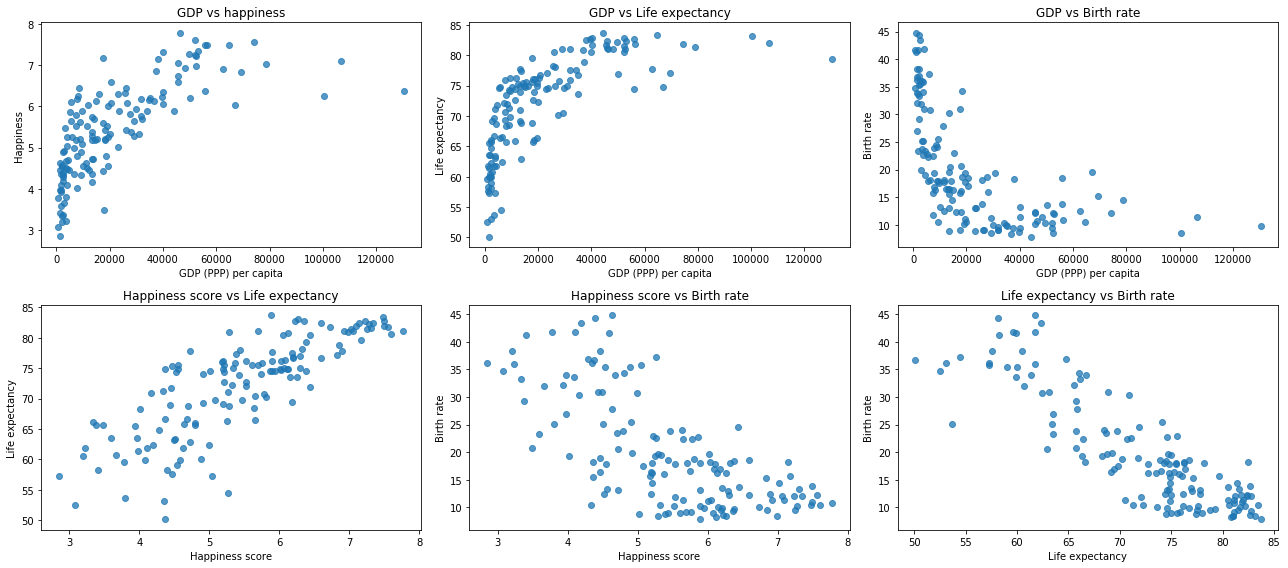

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 8))
# --------------------------------
plt.subplot(2, 3, 1)
plt.scatter("GDP (PPP) per capita", "Happiness score", data = combined_df, alpha = 0.75)
plt.xlabel("GDP (PPP) per capita")
plt.ylabel("Happiness")
plt.title("GDP vs happiness")
# --------------------------------
plt.subplot(2, 3, 2)
plt.scatter("GDP (PPP) per capita", "Life expectancy", data = combined_df, alpha = 0.75)
plt.xlabel("GDP (PPP) per capita")
plt.ylabel("Life expectancy")
plt.title("GDP vs Life expectancy")
# --------------------------------
plt.subplot(2, 3, 3)
plt.scatter("GDP (PPP) per capita", "Birth rate", data = combined_df, alpha = 0.75)
plt.xlabel("GDP (PPP) per capita")
plt.ylabel("Birth rate")
plt.title("GDP vs Birth rate")
# --------------------------------
plt.subplot(2, 3, 4)
plt.scatter("Happiness score", "Life expectancy", data = combined_df, alpha = 0.75)
plt.xlabel("Happiness score")
plt.ylabel("Life expectancy")
plt.title("Happiness score vs Life expectancy")
# --------------------------------
plt.subplot(2, 3, 5)
plt.scatter("Happiness score", "Birth rate", data = combined_df, alpha = 0.75)
plt.xlabel("Happiness score")
plt.ylabel("Birth rate")
plt.title("Happiness score vs Birth rate")
# --------------------------------
plt.subplot(2, 3, 6)
plt.scatter("Life expectancy", "Birth rate", data = combined_df, alpha = 0.75)
plt.xlabel("Life expectancy")
plt.ylabel("Birth rate")
plt.title("Life expectancy vs Birth rate")
# --------------------------------
plt.tight_layout()
plt.savefig("countryplots.png")
plt.show()

In [92]:
combined_df.corr()

,GDP (PPP) per capita,Happiness score,Life expectancy,Birth rate
GDP (PPP) per capita,1.000000,0.716668,0.692343,-0.597972
Happiness score,0.716668,1.000000,0.800542,-0.691355
Life expectancy,0.692343,0.800542,1.000000,-0.863580
Birth rate,-0.597972,-0.691355,-0.863580,1.000000
